# 3.4

终端速度: 713.8625000000004 ft/s
到达300ft所需时间: 13.3013301330133 s
300ft处的速度: 44.90093614916988 ft/s


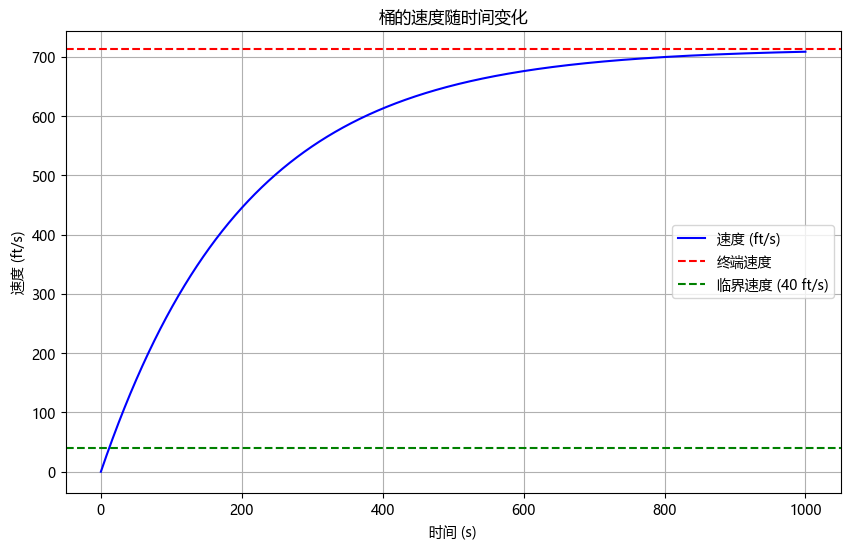

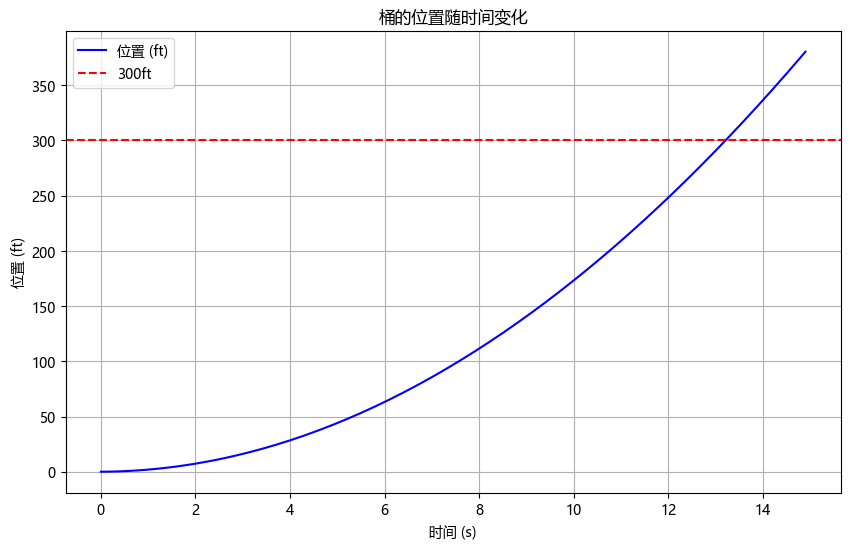

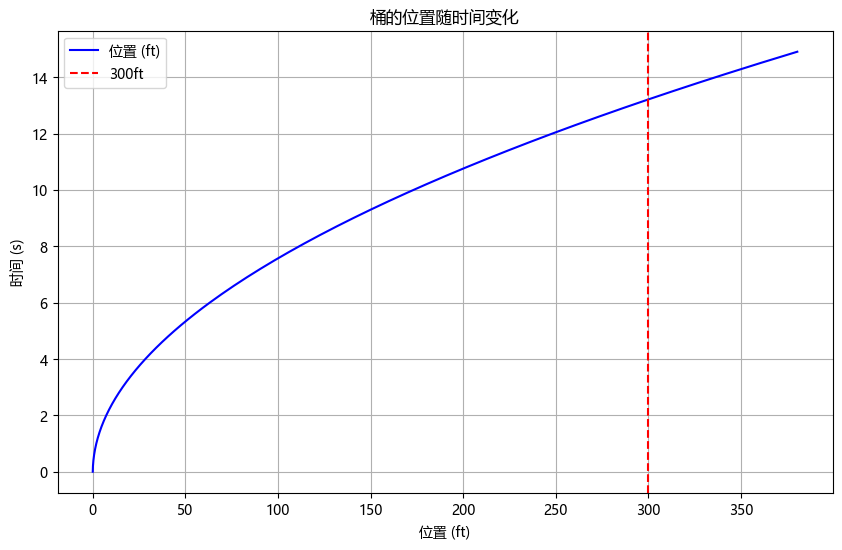

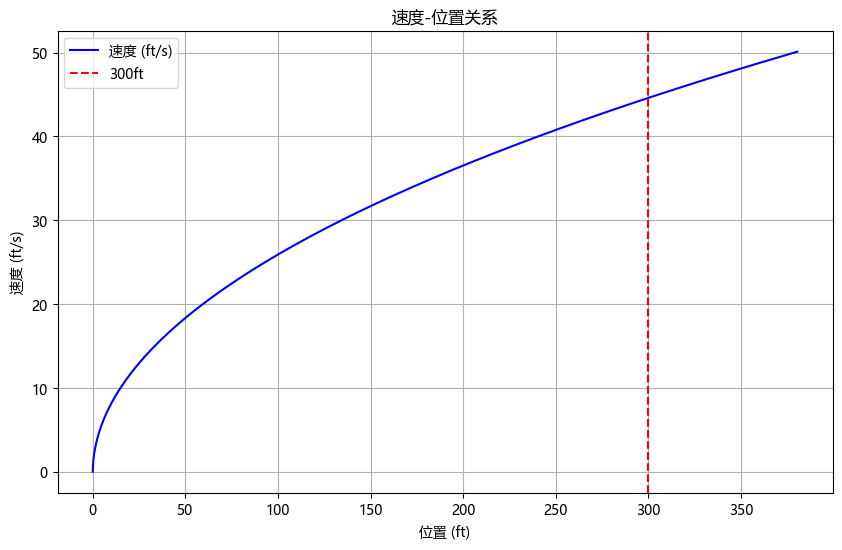

In [4]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# 微软雅黑
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False  # 显示负号

# 已知参数
W = 527.436  # 总质量（lb）
B = 470.327  # 浮力(换算为质量)（lb）
k = 0.08     # 阻力系数（lb·s/ft）
g = 32.2     # 重力加速度（ft/s²）
m = W / g    # 质量（lb·s²/ft）

# 初始条件：v(0) = 0
v0 = 0

# 时间点
t = np.linspace(0, 1000, 10000)  # 模拟到1000s

# 微分方程：dv/dt = (W - B - k*v)/m
def model(v, t):
    dvdt = (W - B - k * v) / m
    return dvdt

# 求解常微分方程
v = odeint(model, v0, t)

# 终端速度
v_terminal = (W - B) / k
print(f"终端速度: {v_terminal} ft/s")

# 计算桶到达300ft的时间
# 位置是速度对时间的积分
s = np.cumsum(v[:, 0]) * (t[1] - t[0])  # 近似积分

# 找到s达到300ft时的时间
index = np.argmax(s >= 300)
time_to_reach_300ft = t[index]
velocity_at_300ft = v[index, 0]

print(f"到达300ft所需时间: {time_to_reach_300ft} s")
print(f"300ft处的速度: {velocity_at_300ft} ft/s")

# 绘制速度-时间图
plt.figure(figsize=(10, 6))
plt.plot(t, v, 'b-', label='速度 (ft/s)')
plt.axhline(y=v_terminal, color='r', linestyle='--', label='终端速度')
plt.axhline(y=40, color='g', linestyle='--', label='临界速度 (40 ft/s)')
plt.xlabel('时间 (s)')
plt.ylabel('速度 (ft/s)')
plt.title('桶的速度随时间变化')
plt.legend()
plt.grid()
plt.show()

# 绘制位置-时间图
plt.figure(figsize=(10, 6))
plt.plot(t[:150], s[:150], 'b-', label='位置 (ft)')
plt.axhline(y=300, color='r', linestyle='--', label='300ft')
plt.xlabel('时间 (s)')
plt.ylabel('位置 (ft)')
plt.title('桶的位置随时间变化')
plt.legend()
plt.grid()
plt.show() 

# 绘制时间-位置图
plt.figure(figsize=(10, 6))
plt.plot(s[:150], t[:150], 'b-', label='位置 (ft)')
plt.axvline(x=300, color='r', linestyle='--', label='300ft')
plt.xlabel('位置 (ft)')
plt.ylabel('时间 (s)')
plt.title('桶的位置随时间变化')
plt.legend()
plt.grid()
plt.show() 


# 绘制速度-位置表
plt.figure(figsize=(10, 6))
plt.plot(s[:150], v[:150], 'b-', label='速度 (ft/s)')
# 画出300ft处的速度
plt.axvline(x=300, color='r', linestyle='--', label='300ft')
plt.xlabel('位置 (ft)')
plt.ylabel('速度 (ft/s)')
plt.title('速度-位置关系')
plt.legend()
plt.grid()
plt.show()





### 3.4 衍生实验 1

题目阻力公式：

$$
F_{阻t}=0.08\ v_t
$$

将阻力公式换为

$$
F_{阻t}=0.08\ v_t^2
$$

终端速度: 26.718205403806603 ft/s
到达300ft所需时间: 16.416416416416418 s
300ft处的速度: 25.991774722418405 ft/s


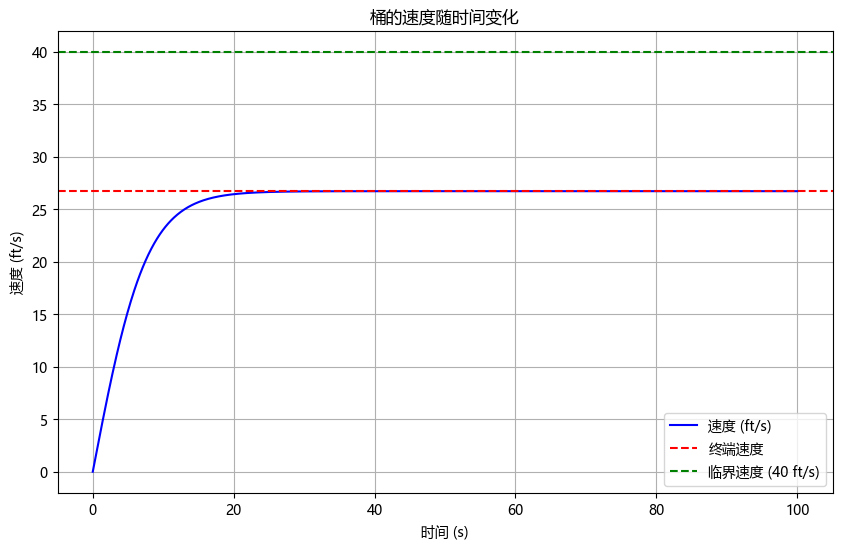

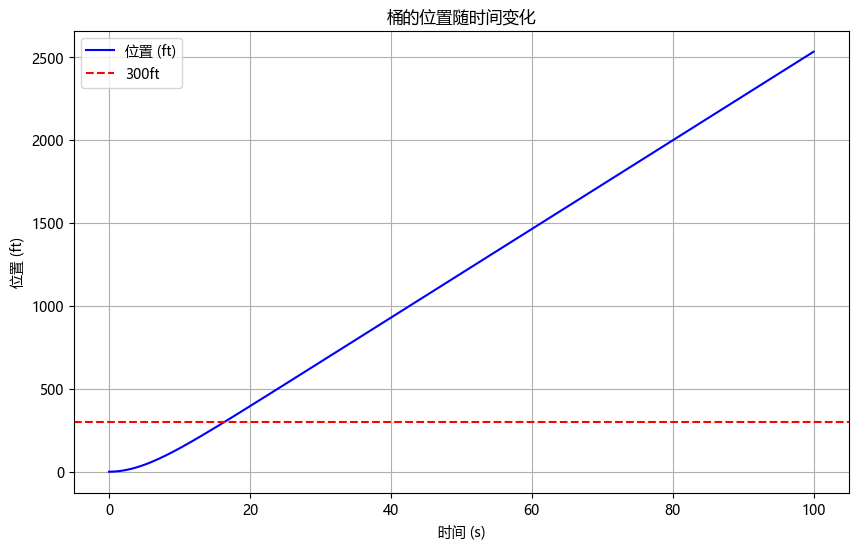

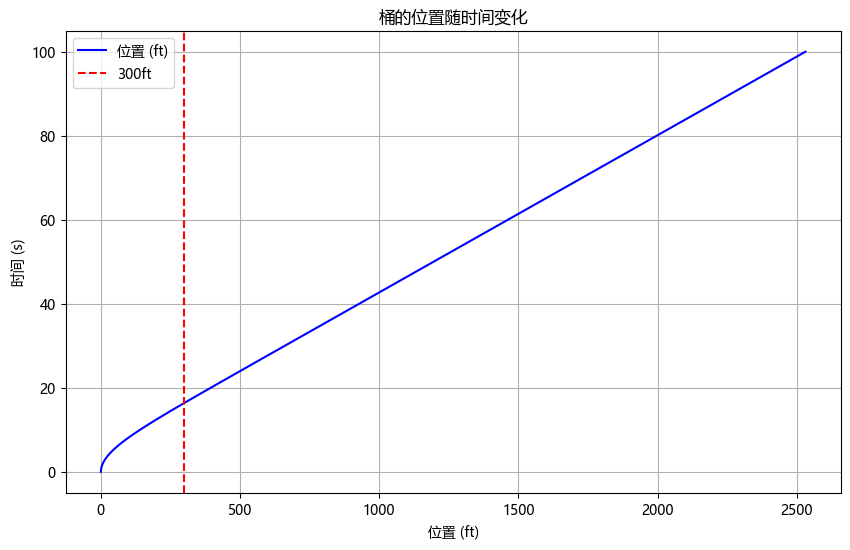

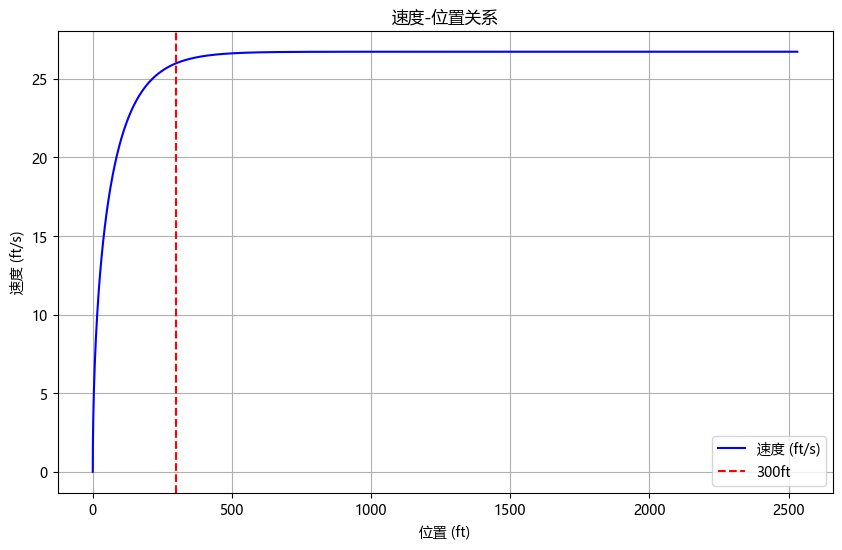

In [8]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# 微软雅黑
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False  # 显示负号

# 已知参数
W = 527.436  # 总质量（lb）
B = 470.327  # 浮力(换算为质量)（lb）
k = 0.08     # 阻力系数（lb·s/ft）
g = 32.2     # 重力加速度（ft/s²）
m = W / g    # 质量（lb·s²/ft）

# 初始条件：v(0) = 0
v0 = 0

# 时间点
t = np.linspace(0, 100, 1000)  # 模拟到100s

# 微分方程：dv/dt = (W - B - k*v)/m
def model(v, t):
    dvdt = (W - B - k * v * v) / m
    return dvdt

# 求解常微分方程
v = odeint(model, v0, t)

# 终端速度
v_terminal = np.sqrt((W - B) / k)
print(f"终端速度: {v_terminal} ft/s")

# 计算桶到达300ft的时间
# 位置是速度对时间的积分
s = np.cumsum(v[:, 0]) * (t[1] - t[0])  # 近似积分

# 找到s达到300ft时的时间
index = np.argmax(s >= 300)
time_to_reach_300ft = t[index]
velocity_at_300ft = v[index, 0]

print(f"到达300ft所需时间: {time_to_reach_300ft} s")
print(f"300ft处的速度: {velocity_at_300ft} ft/s")

# 绘制速度-时间图
plt.figure(figsize=(10, 6))
plt.plot(t, v, 'b-', label='速度 (ft/s)')
plt.axhline(y=v_terminal, color='r', linestyle='--', label='终端速度')
plt.axhline(y=40, color='g', linestyle='--', label='临界速度 (40 ft/s)')
plt.xlabel('时间 (s)')
plt.ylabel('速度 (ft/s)')
plt.title('桶的速度随时间变化')
plt.legend()
plt.grid()
plt.show()

# 绘制位置-时间图
plt.figure(figsize=(10, 6))
plt.plot(t[:], s[:], 'b-', label='位置 (ft)')
plt.axhline(y=300, color='r', linestyle='--', label='300ft')
plt.xlabel('时间 (s)')
plt.ylabel('位置 (ft)')
plt.title('桶的位置随时间变化')
plt.legend()
plt.grid()
plt.show() 

# 绘制时间-位置图
plt.figure(figsize=(10, 6))
plt.plot(s[:], t[:], 'b-', label='位置 (ft)')
plt.axvline(x=300, color='r', linestyle='--', label='300ft')
plt.xlabel('位置 (ft)')
plt.ylabel('时间 (s)')
plt.title('桶的位置随时间变化')
plt.legend()
plt.grid()
plt.show() 


# 绘制速度-位置表
plt.figure(figsize=(10, 6))
plt.plot(s[:], v[:], 'b-', label='速度 (ft/s)')
# 画出300ft处的速度
plt.axvline(x=300, color='r', linestyle='--', label='300ft')
plt.xlabel('位置 (ft)')
plt.ylabel('速度 (ft/s)')
plt.title('速度-位置关系')
plt.legend()
plt.grid()
plt.show()



